In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random

# Linear Regression

##### author: Daodeiv

### Intro

###### LR is basic and comonly used type of predictive analysis.Also linear regression is verry old way for finding the math model over the experimental data ,because every experiment has a noice(error measurments ) with some standart deviation , the linear regression volume down the noice.
###### The overall idea of regression is to examine two things 
###### 1) does a set of predictor variables do a good job in prediction an outcome (dependent) variable ?
###### 2)Which variables in paricular are significat predictorsof outcome variable,and in what wau do they-indicated by the magnitude and sign of the beta estimates–impact the outcome variable?

### Methods 

###### Let's  to define a lienear  function with some noice


In [4]:
def our_function(show='False'):
    """
    our fuction wich will be investigated bellow
    """
    a =4
    c =-10
    f = lambda x : a*x + c + np.random.uniform(0,4)
    x_args = np.linspace(0,10)
    y_args = [f(i) for i in x_args]
    plt.scatter(x_args,y_args)
    if show:
        ##plt.show()
        pass

def plot_function(a,b,cost,show='False'):
    """
    f(x) = ax +b
    takes
    cost the value of cost function
    ploting the linear function 
    
    """
    f = lambda x,a,b : a*x +b
    l = "{}*x_i + {}".format(a,b)
    x_args = np.linspace(0,10)
    our_function()
    y_args = [f(i,a,b) for i in x_args]
    plt.plot(x_args,y_args)
    plt.text(0,20,"cost value = {} a={} b={} ".format(str(cost),a,b))
    if show:
        plt.legend()
        plt.show()
    

###### Our goal is  to find the function f= a*x+b which describe  X and Y values  in approximatly most better way

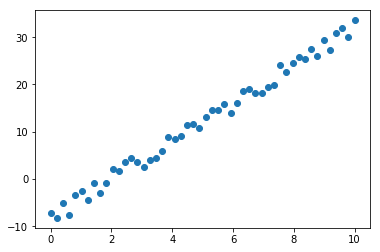

In [5]:
our_function()

#### Every linear function is charactarised with two parameterns a and b where a is measure of tg(<a) between the line and x-line ,and b is the interecept of function,we have to find the parameter a,b 
#### We have to find the formula wich give us the mesurments of errors depends on a and b J(a,b)  



##### The most used Error function or so called Cost function  is  $J(a,b)= (y_ipredict-y_iactual)^2$
##### Total cost function $\frac{1}{2*n}\sum_{n=1}^{n}{(y_ipredict-y_iactual)^2}$ 


##### why above    function is good ?
##### 1) first because it give us the abosolute diference between predicted value and actual vaulu
##### 2) the funcction is differentiable function in every point(in belowe we will se why this so importent)
##### 3) !!! remember our purpose is to find where $\sum_i{(y_ipredict-y_iactual)^2}$  get minimum value not what is this value

##### in more detail written the function looks like this  
 $$\frac{1}{2*n}\sum_{n=1}^{n}{(y_ipredict-y_iactual)^2}=\frac{1}{2*n}\sum_{n=1}^{n}{(y_ipredict-a*x_i + b)^2} $$ 

In [10]:
def cost(a,b,x_args,y_actual_args):
    """
    takes a_predict,b_predict predict value for a and b
    takse x_args,y_actual_args actual values 
    return the the value of cost function
    """
    
    f = lambda x,a,b : a*x + b
    y_actual = np.array(y_actual_args)
  
    y_predict = np.array([f(i,a,b) for i in x_args])
#     print(y_predict.shape)
#     print(y_actual.shape)
    cost = (((y_predict-y_actual)**2).sum())/(2*len(x_args))
    print('for a={} and b={} the cost function give result {}'.format(a,b,cost))
    return cost
    

    


In [9]:
f = lambda x : 4*x -10 + np.random.uniform(0,4)
x_args = np.linspace(0,10)
y_args = [f(i) for i in x_args]
#print(str(y_args))

### lets to see the size of cost function in diferent a and b

No handles with labels found to put in legend.


for a=3 and b=4 the cost function give result 29.177609048367668


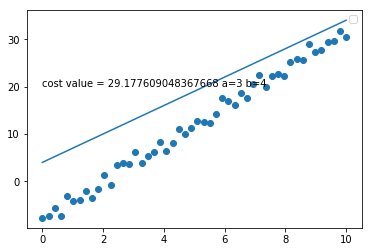

In [11]:
a=3
b=4
value = cost(a,b,x_args,y_args)
value=(str(value))
plot_function(a,b,value)

#### HERE  for a=3 and b=4 the total cost value is 29.177609048367668
### !!! NOTE !!! We are not interested in how is the  size of lost function is big,out goal os to find for wich a,b this dunction has min value

No handles with labels found to put in legend.


for a=-4 and b=15 the cost function give result 419.16041935813445


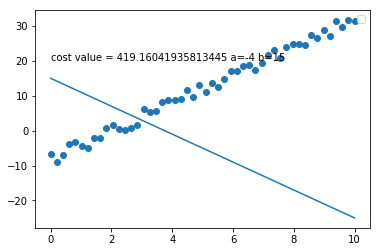

In [12]:
a=-4
b=15
value = cost(a,b,x_args,y_args)
value=(str(value))
plot_function(a,b,value)

#### HERE We can see that the lost value 419.16041935813445 and times more bigger then above example ,and we can see that the function with a=-4 , b=15 modeling the data much worse

No handles with labels found to put in legend.


for a=4 and b=-10 the cost function give result 2.639475585137321


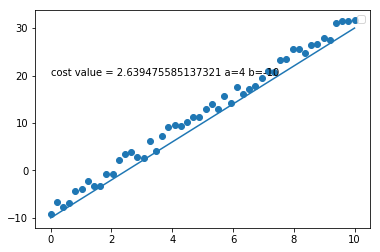

In [13]:
a=4
b=-10
value = cost(a,b,x_args,y_args)
value=(str(value))
plot_function(a,b,value)

####  When a=4 and b=-10  it seem that the function descrive the data verry well and the lost function has 
##### result 2.639475585137321 wich much less then the above examples, maybe this is a min value but we have to create the algorithm which will find the min value of J (a, b ) depends of a,b 

### In mathematical analisis has Rolle's Theorem ,which is used for finding the min of 
### function .The condition is when f'(x) = and f(x+e) - f(x) >0 then x has a local minum
but we will use numerical appraoch for findimg minum called  GRADIENT DESCENT .This method is explained <a href='https://github.com/Daodavid93/Machine-Learning-first-steps/blob/master/Regresion%20Model/gradient%20descent.ipynb'>HERE</a>
Gradient Descent:
 The Lost function $J(a,b) = \sum_{n=1}^{n}{(a*x_i + b - y_ipredict)^2}$
 alogoritms
 $$a = a - \nabla_a(J(a,b)*h$$
  $$b = b - \nabla_b(J(a,b)*h$$
##### where h is learning rate or step size
$$\nabla_a(J(a,b)=\frac{\partial{J}}{\partial{a}}=\frac{1}{n}\sum_{n=1}^{n}*{(y_ipredict-a*x_i + b)*x_i} $$
$$\nabla_a(J(a,b)=\frac{\partial{J}}{\partial{b}}=\frac{1}{n}\sum_{n=1}^{n}\frac{1}{n}*{(y_ipredict-a*x_i + b)} $$


In [66]:
def perform_gradient_descent(x_args , y_actual,learning_rate=0.01,init_a=10,init_b=10,iteration=5000,debug=False,return_result_array=False):
    """
   
    """
    a = init_a
    b= init_b
    a_args = []
    b_args = []
    x = np.array(x_args)
    y = np.array(y_actual)
    for i in range(iteration):
        #gradient_a =((((np.array(y_actual) - (a*np.array(x_args)  +b))*x_args).sum())* (2/len(x_args))) 
        #gradient_b = (((np.array(y_actual) - (a*np.array(x_args)  +b)).sum())* (2/len(x_args)))
        a_gradient = -2 / len(x_args) * np.sum(x * (y - (a * x + b)))
        b_gradient = -2 / len(x_args) * np.sum(y - (a * x + b))
        new_a = a - a_gradient*learning_rate
        new_b = b - b_gradient*learning_rate
        a_args.append(a)
        b_args.append(b)
        a = new_a
        b=new_b
        if debug :
            print('a = {} , b = {}'.format(a,b))
            print('grad a = {} , grad b = {}'.format(a_gradient,b_gradient))
            
    if return_result_array:
        return x_args,a_args,b_args
    else :
        return a,b
            
    

    
    
    
    

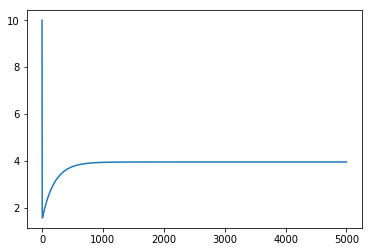

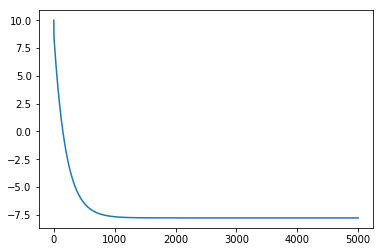

In [67]:
x,a,b = perform_gradient_descent(x_args,y_args,return_result_array=True)
plt.plot(a)
plt.show()
plt.plot(b)

No handles with labels found to put in legend.


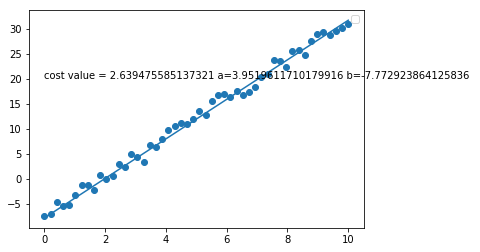

In [68]:
a,b = perform_gradient_descent(x_args,y_args)

plot_function(a,b,value)

### Our Model is super

Lets to define class LinearRegression

In [ ]:
class LinearRegression:
    def __init__(self,learning_rate)
        self.coef_=Nan
        self.intecept_=Nan
        self_learning_rate =learning_rate 
    
    